**Author:** [Hasan Ali](https://www.linkedin.com/in/learnmlwithhasan/)

### Regularization

Regularization is a technique which makes slight modifications to the learning algorithm such that the model generalizes better. This in turn improves the model’s performance on the unseen data as well. 

Remember when we were adding more layers to the model (making it more complex) ? Adding more than required layers might also lead to overfitting. 

*By looking at the graph below can you guess, what should be an ideal model complexity.*

![perfect_point.png](https://drive.google.com/uc?export=view&id=1isDRyvRtMFPhC8RQHL9Puh-OoOm0z9FP)

Somethings in Deep Learning can't be learnt in the first go. Regularisation is one of them. It takes some time. So, dont be hard on yourself and let this absorb.

Here is how to use it in your neural networks.
```python
model.add(Dense(256,activation='relu', kernel_regularizer = 'l2'))
```

### Dropouts

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. As mentioned, it is preferrably used when training a large neural network. 

In [1]:
from IPython.display import Image
Image(url="https://miro.medium.com/max/1200/1*iWQzxhVlvadk6VAJjsgXgg.png", width=800, height=500)

*By dropping a unit out, we mean temporarily removing it from the network, along with all its incoming and outgoing connections*

Dropout has the effect of making the training process noisy, forcing nodes within a layer to probabilistically take on more or less responsibility for the inputs.
This conceptualization suggests that perhaps dropout breaks-up situations where network layers co-adapt to correct mistakes from prior layers, in turn making the model more robust.

It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and recurrent layers such as the long short-term memory network layer. Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. 

`NOTE` : It is not used on the output layer.

In [2]:
from tensorflow.keras.datasets import mnist
# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


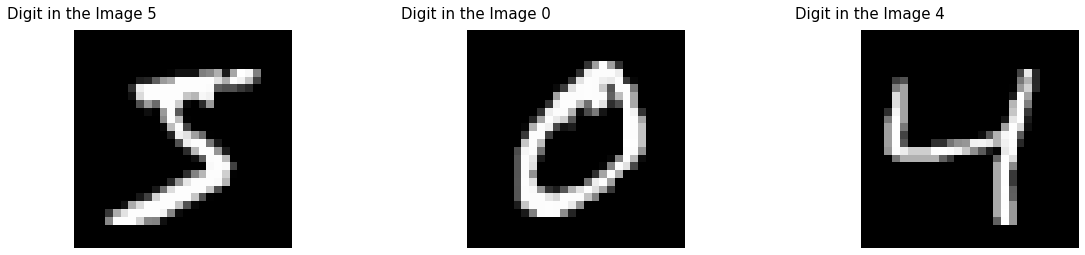

In [3]:
images = X_train[:3]
labels = y_train[:3]

f,ax = plt.subplots(nrows=1,ncols=3, figsize=(20,4))

for index,(img, ax) in enumerate(zip(images, ax)):
    
    ax.imshow(img,cmap='gray')
    ax.axis('off')
    ax.text(0.6,-2.0, f"Digit in the Image {labels[index]}", size=15, ha="center")
    
plt.show()

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from datetime import datetime

In [5]:
###why did we reshaped ?? Question for you !

X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [6]:
###what is to_categorical doing here ? Question for you !

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape= (784,) ))
model.add(Dropout(0.2)) ###using dropout
model.add(Dense(256,activation='relu', kernel_regularizer = 'l2'))###using regularizer
model.add(Dropout(0.2))###using dropout
model.add(Dense(256,activation='relu', kernel_regularizer = 'l2')) ###using regularizer
model.add(Dropout(0.2))###using dropout
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [8]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [9]:
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
training_history = model.fit(
    X_train, # input
    y_train, # output
    batch_size=32,
    verbose=1, # Suppress chatty output; use Tensorboard instead
    epochs=10,
    validation_data=(X_test, y_test),
    callbacks=[tensorboard_callback, es],
)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 4.8968 - accuracy: 0.1560 - val_loss: 4.6326 - val_accuracy: 0.2033
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 4.5876 - accuracy: 0.1834 - val_loss: 4.4366 - val_accuracy: 0.2015
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 4.3908 - accuracy: 0.1895 - val_loss: 4.2038 - val_accuracy: 0.2277
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 4.1661 - accuracy: 0.2095 - val_loss: 3.8580 - val_accuracy: 0.2492
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 3.8562 - accuracy: 0.2840 - val_loss: 3.6187 - val_accuracy: 0.3419
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 3.6629 - accuracy: 0.3006 - val_loss: 3.4202 - val_accuracy: 0.3579
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.4880 - accuracy: 0.3069 - val_loss: 3.2624 - val_accuracy:

This is just for demo purpose, dorpouts is majorly used in deep/wide neural networks. This is a very basic one. As you can see, the accuracy is increasing very slowly and steadily and the model is yet to converge it will take around 100 more epochs. 

#### Why not just use early stopping rather than regularisation ?

The main downside of early stopping is that this couples two tasks:

1. Algorithm to optimize the cost function j (eg gradient descent, adam etc)
2. Prevent overfitting (ie get more data, regularization)

because by stopping gradient decent early, we are sort of breaking whatever we are doing to optimize cost function J and simultaneously trying to not over fit. Rather than using early stopping, one alternative is just use L2 regularization then we can just train the neural network as long as possible(the downside here is we have to try a lot of values of the regularization parameter lambda and hence it becomes computationally expensive)

**Points to conclude with**

- Large weights in a neural network are a sign of a more complex network that has overfit the training data.
- Probabilistically dropping out nodes in the network is a simple and effective regularization method.
- A large network with more training and the use of a weight constraint are suggested when using dropout.